# Copyright (c) 2018, Faststream Technologies
# Author: Sudhanva Narayana

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### CURR and PARENT directory constants

In [2]:
CURR_DIR = os.path.dirname(os.path.abspath('__file__'))
PARENT_DIR = os.path.abspath(os.path.join(CURR_DIR, os.pardir))

### Import dataset ignoring headers

In [6]:
df = pd.read_csv(PARENT_DIR + '\\assets\\datasets\\eit_data.csv', index_col=[0], header = [0], skiprows= [1] ,skipinitialspace=True)

### Dataset

In [11]:
df.head()

,gray,violet,blue,green,yellow,orange,red,brown,target
0,5012,0,66475,0,0,51548,0,104101,1
1,8461,0,84013,0,0,42614,0,92048,0
2,27101,0,45398,0,0,51277,0,103360,1
3,23992,0,79882,0,0,40349,0,82913,0
4,15075,0,61161,0,0,57718,0,93182,1


### Visualise the higher intensities

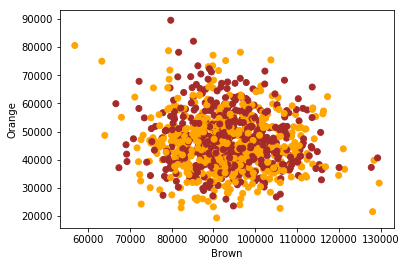

In [18]:
plt.scatter(df['brown'], df['orange'], c=['brown', 'orange'])
plt.xlabel("Brown")
plt.ylabel("Orange")
plt.show()

### Importing dataset

In [23]:
X = df.loc[:, ['gray', 'violet', 'blue', 'green', 'yellow', 'orange', 'red', 'brown']].values.astype(float)
y = df.loc[:, ['target']].values

### Splitting the dataset into the Training set and Test set (75%, 25%)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
y_train = y_train.ravel()

### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Fitting classifier to the Training set

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Predicting the Test set results

y_pred = classifier.predict(X_test)

classifier.score(X_test, y_test)